## Import

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [ ]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_ , _ ) = fashion_mnist.load_data()

# Get only a subpart of the dataset
# Get only a subpart
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784) # reshapes each image into a one-dimensional array of length 784
images = images.astype(float) #the dataset is converted to floating-point numbers using images.astype(float).
# This step is often necessary for compatibility with certain machine learning algorithms or to ensure consistent data types across the dataset.

scaler = StandardScaler()
images = scaler.fit_transform(images)

print(images.shape)
print(targets.shape)

4422102/4422102 [==============================] - 0s 0us/step
(10000, 784)
(10000,)


## Plot one of the data

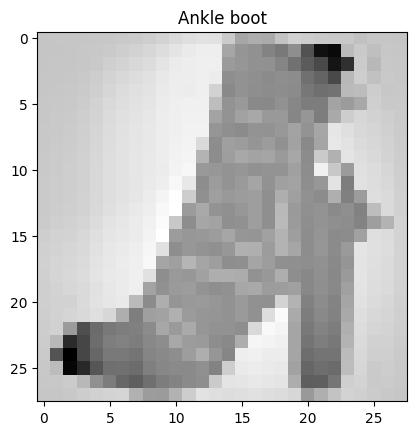

In [ ]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

# Add the layers

In [ ]:
# ####
model = tf.keras.models.Sequential()

# Add 3 layers,
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))



## Compile the model

In [ ]:
# Compile the model with the appropriate loss function and with sgd optimizer
# the default value of the learning rate is 0.01
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [ ]:
#train your model. The number of itérations is 10.
#Batch size=32 by default : 8000/32=250 batches
history = model.fit(images, targets,validation_split=0.2,epochs=10)
#

Epoch 1/10
250/250 [==============================] - 4s 11ms/step - loss: 0.8830 - accuracy: 0.7074 - val_loss: 0.6214 - val_accuracy: 0.7850
Epoch 2/10
250/250 [==============================] - 3s 12ms/step - loss: 0.5229 - accuracy: 0.8140 - val_loss: 0.5215 - val_accuracy: 0.8175
Epoch 3/10
250/250 [==============================] - 3s 10ms/step - loss: 0.4393 - accuracy: 0.8450 - val_loss: 0.4736 - val_accuracy: 0.8305
Epoch 4/10
250/250 [==============================] - 2s 10ms/step - loss: 0.3920 - accuracy: 0.8614 - val_loss: 0.4620 - val_accuracy: 0.8340
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3589 - accuracy: 0.8755 - val_loss: 0.4504 - val_accuracy: 0.8430
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3319 - accuracy: 0.8849 - val_loss: 0.4294 - val_accuracy: 0.8510
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3090 - accuracy: 0.8926 - val_loss: 0.4296 - val_accuracy: 0.8490
Ep

In [ ]:
model.fit?

## Model Summary

In [ ]:
#display the summary of your model
model.summary()
#number of param of one layer: (input size+1)*Number of neurons in the layer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


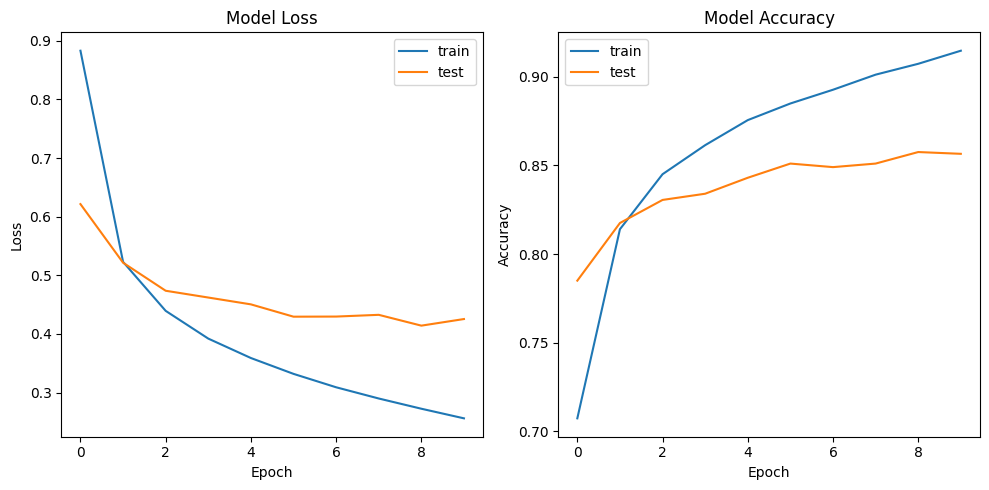

In [ ]:
import matplotlib.pyplot as plt

# Plot loss curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
def build_model(optimizer):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation="relu", input_shape=(784,)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )
    return model


In [ ]:
optimizers = ['sgd', 'adam', 'rmsprop', 'adagrad']
histories = {}

for opt in optimizers:
    print(f"Training with {opt} optimizer...")
    model = build_model(opt)
    history = model.fit(images, targets, validation_split=0.2, epochs=10, verbose=0)
    histories[opt] = history


Training with sgd optimizer...
Training with adam optimizer...
Training with rmsprop optimizer...
Training with adagrad optimizer...


In [ ]:
def plot_model_performance(history, title="Model Performance"):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


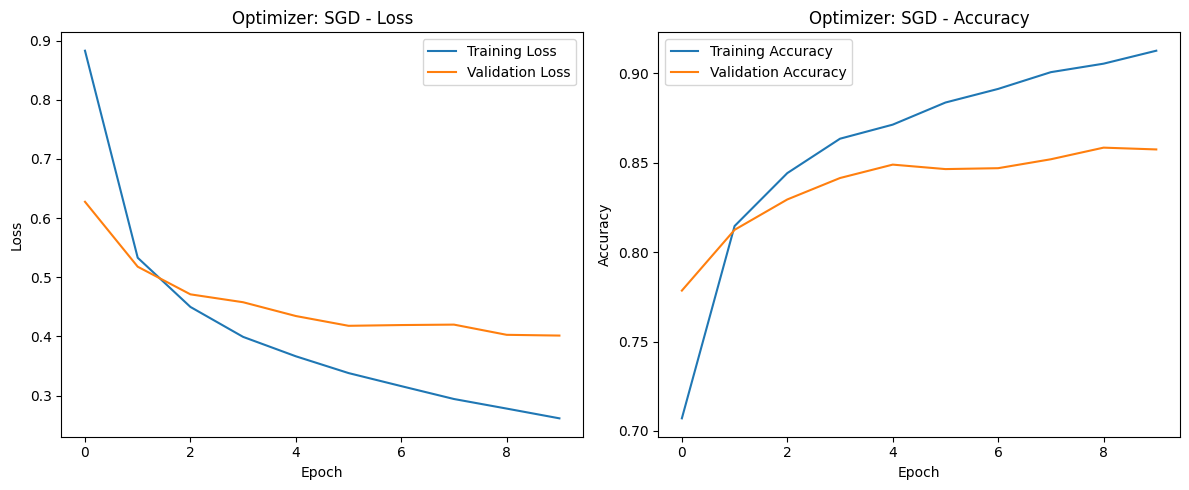

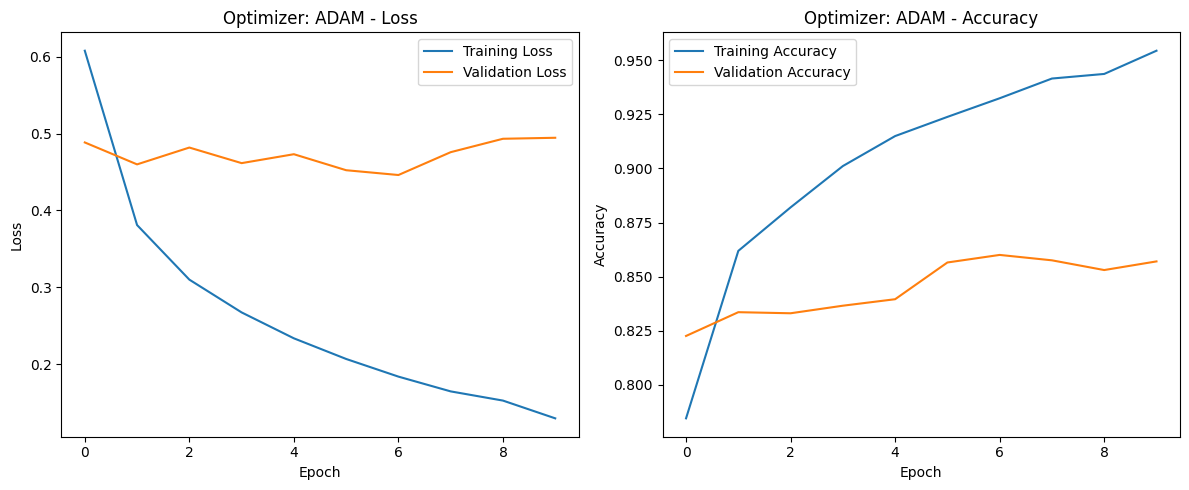

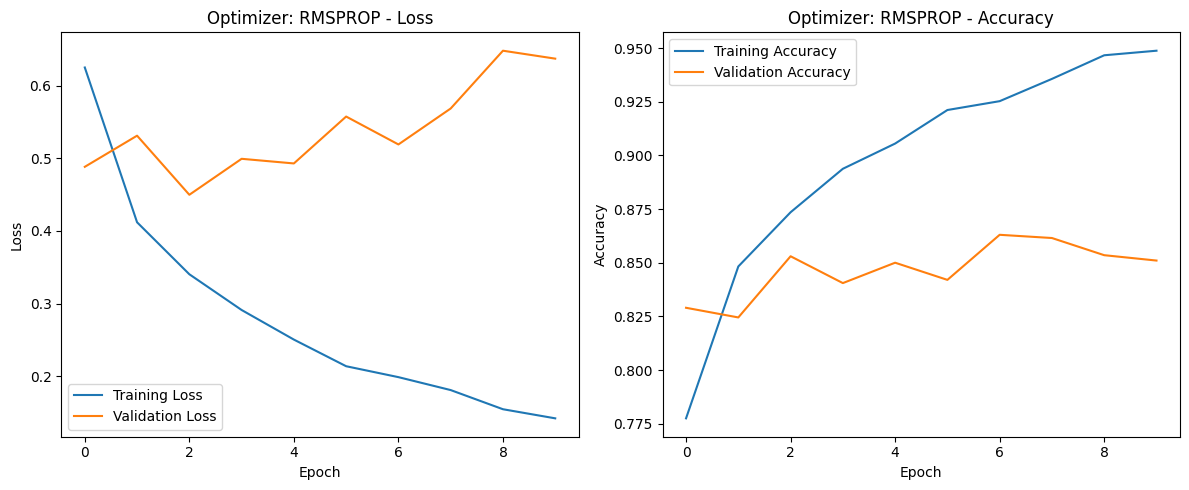

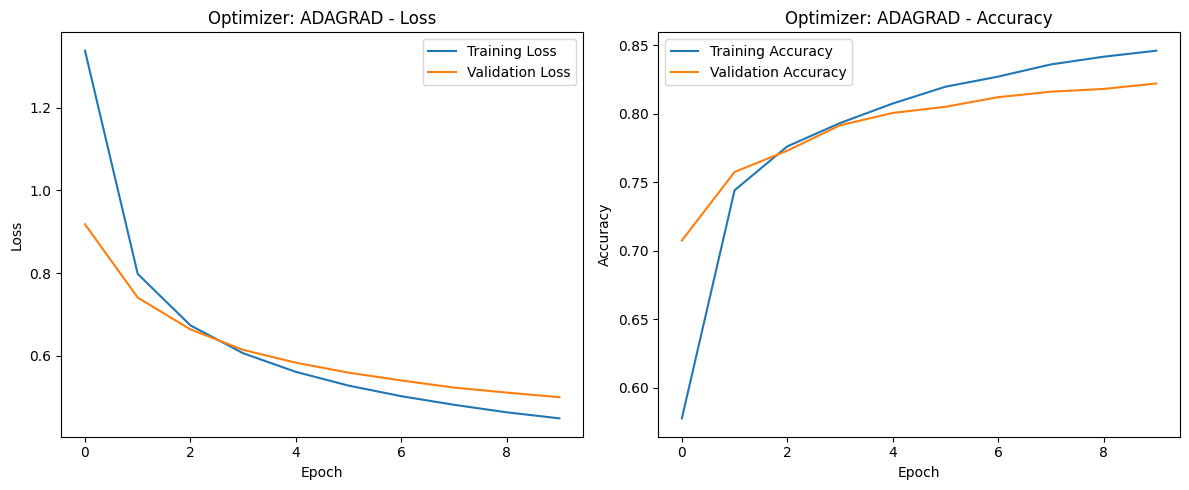

In [ ]:
for opt, history in histories.items():
    plot_model_performance(history, title=f"Optimizer: {opt.upper()}")


In [ ]:
def build_model(optimizer):
    model = Sequential([
        Dense(256, activation="relu", input_shape=(784,)),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax")
    ])
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )
    return model


In [ ]:
#  Batch Gradient Descent
optimizer_bgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0)
model_bgd = build_model(optimizer_bgd)
history_bgd = model_bgd.fit(images, targets, epochs=10, batch_size=len(images), validation_split=0.2)


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 2.7378 - accuracy: 0.1104 - val_loss: 2.6043 - val_accuracy: 0.1310
Epoch 2/10
1/1 [==============================] - 0s 259ms/step - loss: 2.5953 - accuracy: 0.1399 - val_loss: 2.4761 - val_accuracy: 0.1615
Epoch 3/10
1/1 [==============================] - 0s 247ms/step - loss: 2.4661 - accuracy: 0.1686 - val_loss: 2.3597 - val_accuracy: 0.1960
Epoch 4/10
1/1 [==============================] - 0s 249ms/step - loss: 2.3487 - accuracy: 0.1992 - val_loss: 2.2541 - val_accuracy: 0.2220
Epoch 5/10
1/1 [==============================] - 0s 219ms/step - loss: 2.2419 - accuracy: 0.2288 - val_loss: 2.1579 - val_accuracy: 0.2645
Epoch 6/10
1/1 [==============================] - 0s 199ms/step - loss: 2.1446 - accuracy: 0.2607 - val_loss: 2.0703 - val_accuracy: 0.2975
Epoch 7/10
1/1 [==============================] - 0s 233ms/step - loss: 2.0558 - accuracy: 0.2971 - val_loss: 1.9905 - val_accuracy: 0.3335
Epoch 8/10
1/1 [=======

In [ ]:
# Stochastic Gradient Descent
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0)
model_sgd = build_model(optimizer_sgd)
history_sgd = model_sgd.fit(images, targets, epochs=10, batch_size=1, validation_split=0.2)


Epoch 1/10
8000/8000 [==============================] - 20s 2ms/step - loss: 0.6674 - accuracy: 0.7634 - val_loss: 0.5569 - val_accuracy: 0.8025
Epoch 2/10
8000/8000 [==============================] - 20s 3ms/step - loss: 0.4768 - accuracy: 0.8292 - val_loss: 0.5844 - val_accuracy: 0.7920
Epoch 3/10
8000/8000 [==============================] - 23s 3ms/step - loss: 0.4055 - accuracy: 0.8499 - val_loss: 0.4831 - val_accuracy: 0.8365
Epoch 4/10
8000/8000 [==============================] - 24s 3ms/step - loss: 0.3489 - accuracy: 0.8715 - val_loss: 0.5149 - val_accuracy: 0.8245
Epoch 5/10
8000/8000 [==============================] - 21s 3ms/step - loss: 0.3647 - accuracy: 0.8734 - val_loss: 0.5553 - val_accuracy: 0.8280
Epoch 6/10
8000/8000 [==============================] - 23s 3ms/step - loss: 0.3178 - accuracy: 0.8852 - val_loss: 0.4946 - val_accuracy: 0.8335
Epoch 7/10
8000/8000 [==============================] - 23s 3ms/step - loss: 0.2694 - accuracy: 0.8969 - val_loss: 0.6453 - val_ac

In [ ]:
#  Mini-Batch Gradient Descent
optimizer_mini_batch = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0)
model_mini_batch = build_model(optimizer_mini_batch)
history_mini_batch = model_mini_batch.fit(images, targets, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
250/250 [==============================] - 2s 7ms/step - loss: 0.8538 - accuracy: 0.7204 - val_loss: 0.6062 - val_accuracy: 0.7780
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 0.5281 - accuracy: 0.8145 - val_loss: 0.5118 - val_accuracy: 0.8140
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4482 - accuracy: 0.8405 - val_loss: 0.4670 - val_accuracy: 0.8310
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4016 - accuracy: 0.8600 - val_loss: 0.4416 - val_accuracy: 0.8435
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3675 - accuracy: 0.8698 - val_loss: 0.4356 - val_accuracy: 0.8530
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3399 - accuracy: 0.8808 - val_loss: 0.4163 - val_accuracy: 0.8570
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3182 - accuracy: 0.8890 - val_loss: 0.4077 - val_accuracy: 0.8570
Epoch 

In [ ]:
#  Gradient Descent with Momentum
optimizer_momentum = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_momentum = build_model(optimizer_momentum)
history_momentum = model_momentum.fit(images, targets, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
250/250 [==============================] - 1s 4ms/step - loss: 0.6395 - accuracy: 0.7739 - val_loss: 0.5121 - val_accuracy: 0.8105
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3851 - accuracy: 0.8596 - val_loss: 0.4343 - val_accuracy: 0.8460
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3078 - accuracy: 0.8875 - val_loss: 0.4475 - val_accuracy: 0.8360
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2498 - accuracy: 0.9097 - val_loss: 0.4259 - val_accuracy: 0.8545
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2090 - accuracy: 0.9243 - val_loss: 0.4048 - val_accuracy: 0.8605
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.1804 - accuracy: 0.9366 - val_loss: 0.4331 - val_accuracy: 0.8525
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.1543 - accuracy: 0.9446 - val_loss: 0.4435 - val_accuracy: 0.8620
Epoch 

In [ ]:
def plot_model_performance(history, title="Model Performance"):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


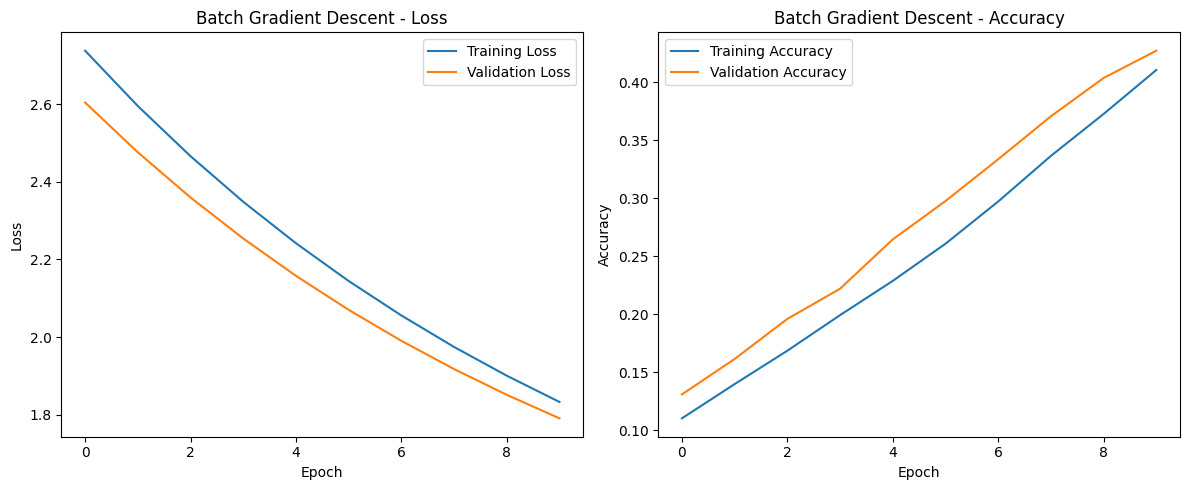

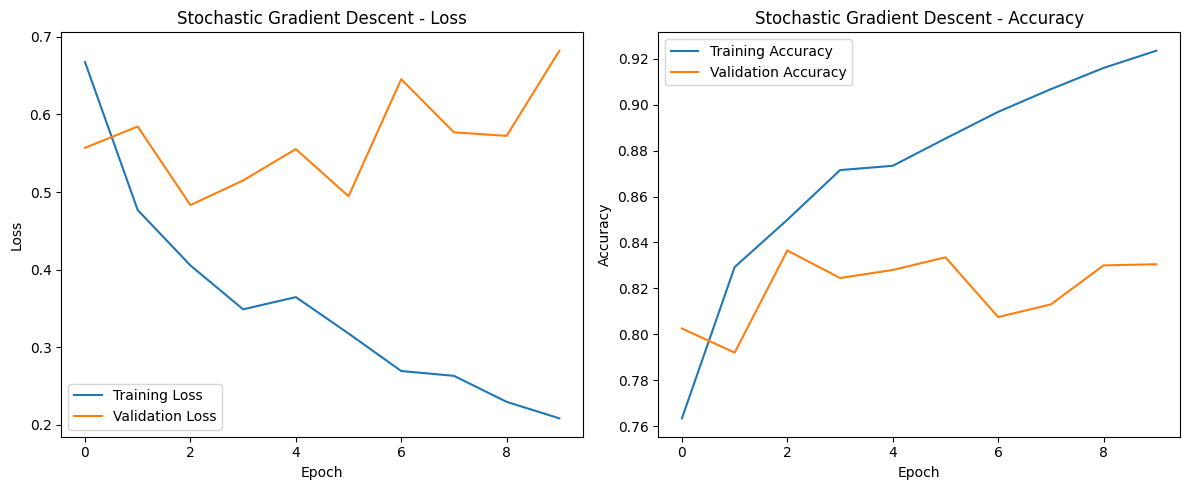

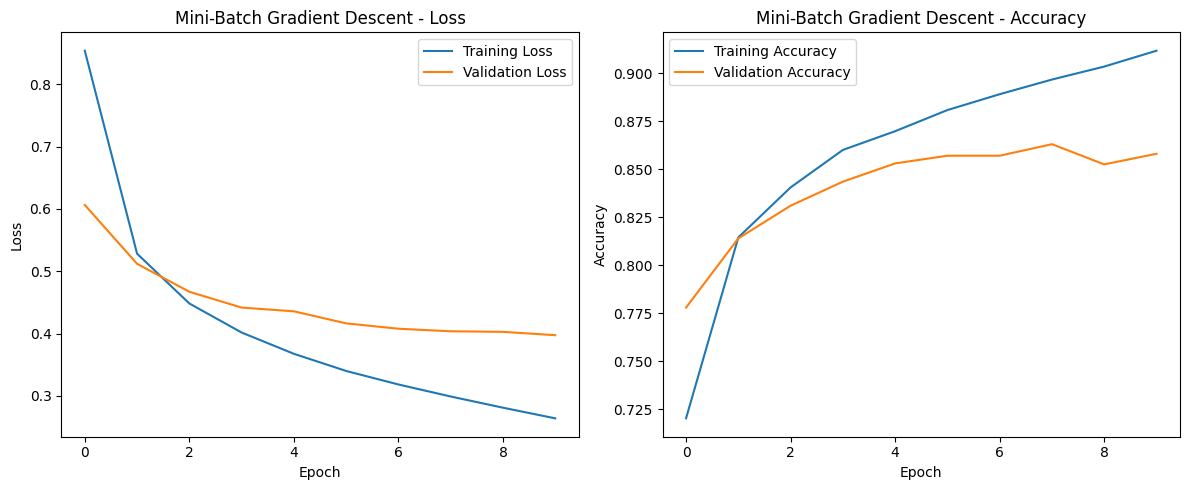

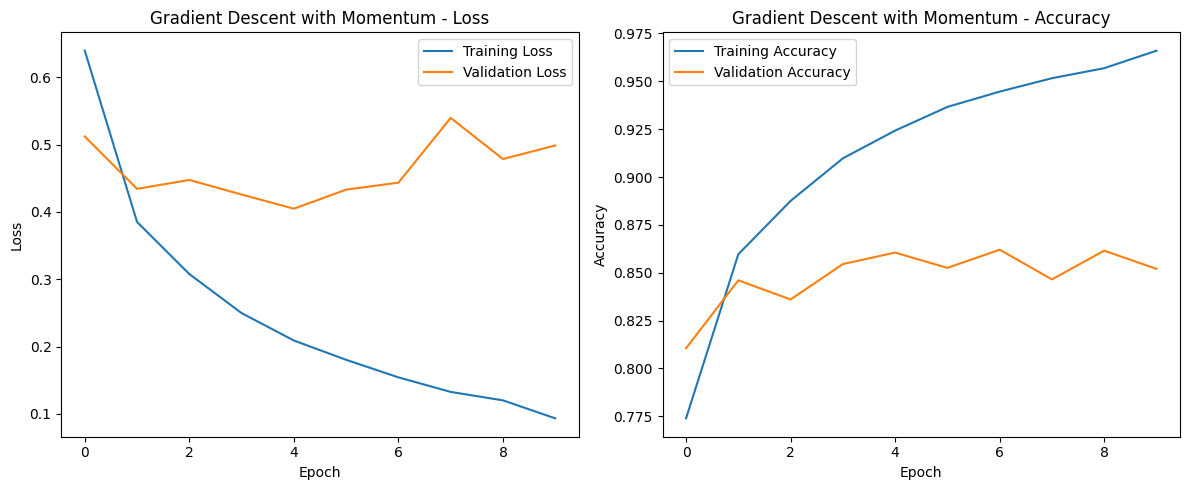

In [ ]:
plot_model_performance(history_bgd, "Batch Gradient Descent")
plot_model_performance(history_sgd, "Stochastic Gradient Descent")
plot_model_performance(history_mini_batch, "Mini-Batch Gradient Descent")
plot_model_performance(history_momentum, "Gradient Descent with Momentum")
